In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

data=pd.read_csv('../input/cornell-car-rental-dataset/CarRentalData.csv')
data.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5776 non-null   object 
 1   rating              5350 non-null   float64
 2   renterTripsTaken    5851 non-null   int64  
 3   reviewCount         5851 non-null   int64  
 4   location.city       5851 non-null   object 
 5   location.country    5851 non-null   object 
 6   location.latitude   5851 non-null   float64
 7   location.longitude  5851 non-null   float64
 8   location.state      5851 non-null   object 
 9   owner.id            5851 non-null   int64  
 10  rate.daily          5851 non-null   int64  
 11  vehicle.make        5851 non-null   object 
 12  vehicle.model       5851 non-null   object 
 13  vehicle.type        5851 non-null   object 
 14  vehicle.year        5851 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 685.8+

In [3]:
print(data.isnull().sum())

fuelType               75
rating                501
renterTripsTaken        0
reviewCount             0
location.city           0
location.country        0
location.latitude       0
location.longitude      0
location.state          0
owner.id                0
rate.daily              0
vehicle.make            0
vehicle.model           0
vehicle.type            0
vehicle.year            0
dtype: int64


In [4]:
data["fuelType"].value_counts()

GASOLINE    4810
ELECTRIC     622
HYBRID       274
DIESEL        70
Name: fuelType, dtype: int64

In [5]:
data["location.country"].value_counts()

US    5851
Name: location.country, dtype: int64

In [6]:
data.drop("location.country", axis=1, inplace=True)

In [7]:
data.describe()

,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year
count,5350.000000,5851.000000,5851.000000,5851.000000,5851.000000,5.851000e+03,5851.000000,5851.000000
mean,4.920325,33.477354,28.454794,35.582889,-99.632773,6.034830e+06,93.691506,2015.340113
std,0.182425,41.898954,35.136113,6.431408,20.391476,4.646022e+06,96.080920,4.050813
min,1.000000,0.000000,0.000000,21.272565,-158.165693,5.105000e+03,20.000000,1955.000000
25%,4.900000,5.000000,4.000000,30.453623,-117.158285,1.917451e+06,45.000000,2014.000000
50%,5.000000,18.000000,16.000000,35.554502,-95.673319,4.968749e+06,69.000000,2016.000000
75%,5.000000,46.000000,39.000000,39.996864,-81.538631,9.657496e+06,110.000000,2018.000000
max,5.000000,395.000000,321.000000,64.893610,-68.823637,1.581088e+07,1500.000000,2020.000000


In [8]:
# get number of categories value 
print("Number of Categories in: ")
for ColName in data[['fuelType','location.city','location.state','vehicle.make','vehicle.model','vehicle.year']]:
    print("{} = {}".format(ColName,len(data[ColName].unique())))
    

Number of Categories in: 
fuelType = 5
location.city = 971
location.state = 46
vehicle.make = 54
vehicle.model = 526
vehicle.year = 34


In [9]:
median=data["rating"].median()
data["rating"].fillna(median, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5776 non-null   object 
 1   rating              5851 non-null   float64
 2   renterTripsTaken    5851 non-null   int64  
 3   reviewCount         5851 non-null   int64  
 4   location.city       5851 non-null   object 
 5   location.latitude   5851 non-null   float64
 6   location.longitude  5851 non-null   float64
 7   location.state      5851 non-null   object 
 8   owner.id            5851 non-null   int64  
 9   rate.daily          5851 non-null   int64  
 10  vehicle.make        5851 non-null   object 
 11  vehicle.model       5851 non-null   object 
 12  vehicle.type        5851 non-null   object 
 13  vehicle.year        5851 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 640.1+ KB


In [11]:
data1 = data.replace(np.nan, 'GASOLINE', regex=True)

In [12]:
data1 = data1.rename(columns={'location.latitude': 'latitude', 'location.longitude': 'longitude',
                             'rate.daily': 'rate_daily','vehicle.year': 'vehicle_year'})

In [12]:
data1.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,latitude,longitude,location.state,owner.id,rate_daily,vehicle.make,vehicle.model,vehicle.type,vehicle_year
0,ELECTRIC,5.00,13,12,Seattle,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010


<AxesSubplot:>

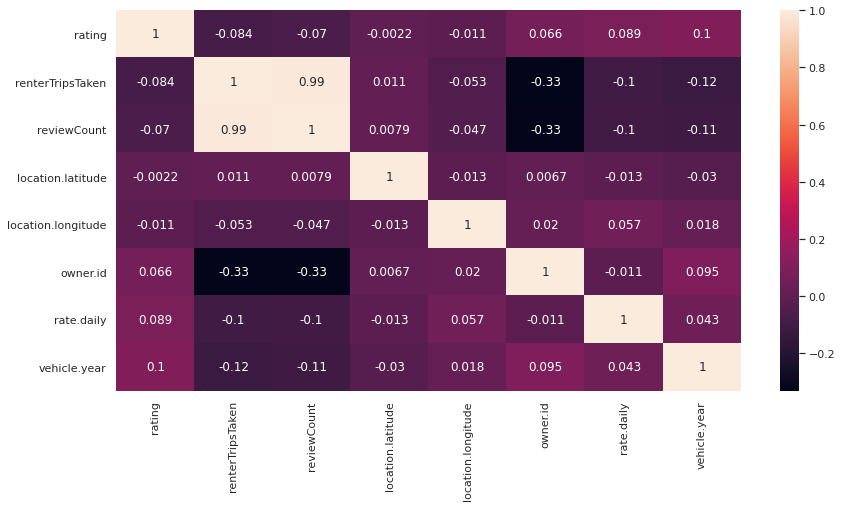

In [23]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(), annot=True)

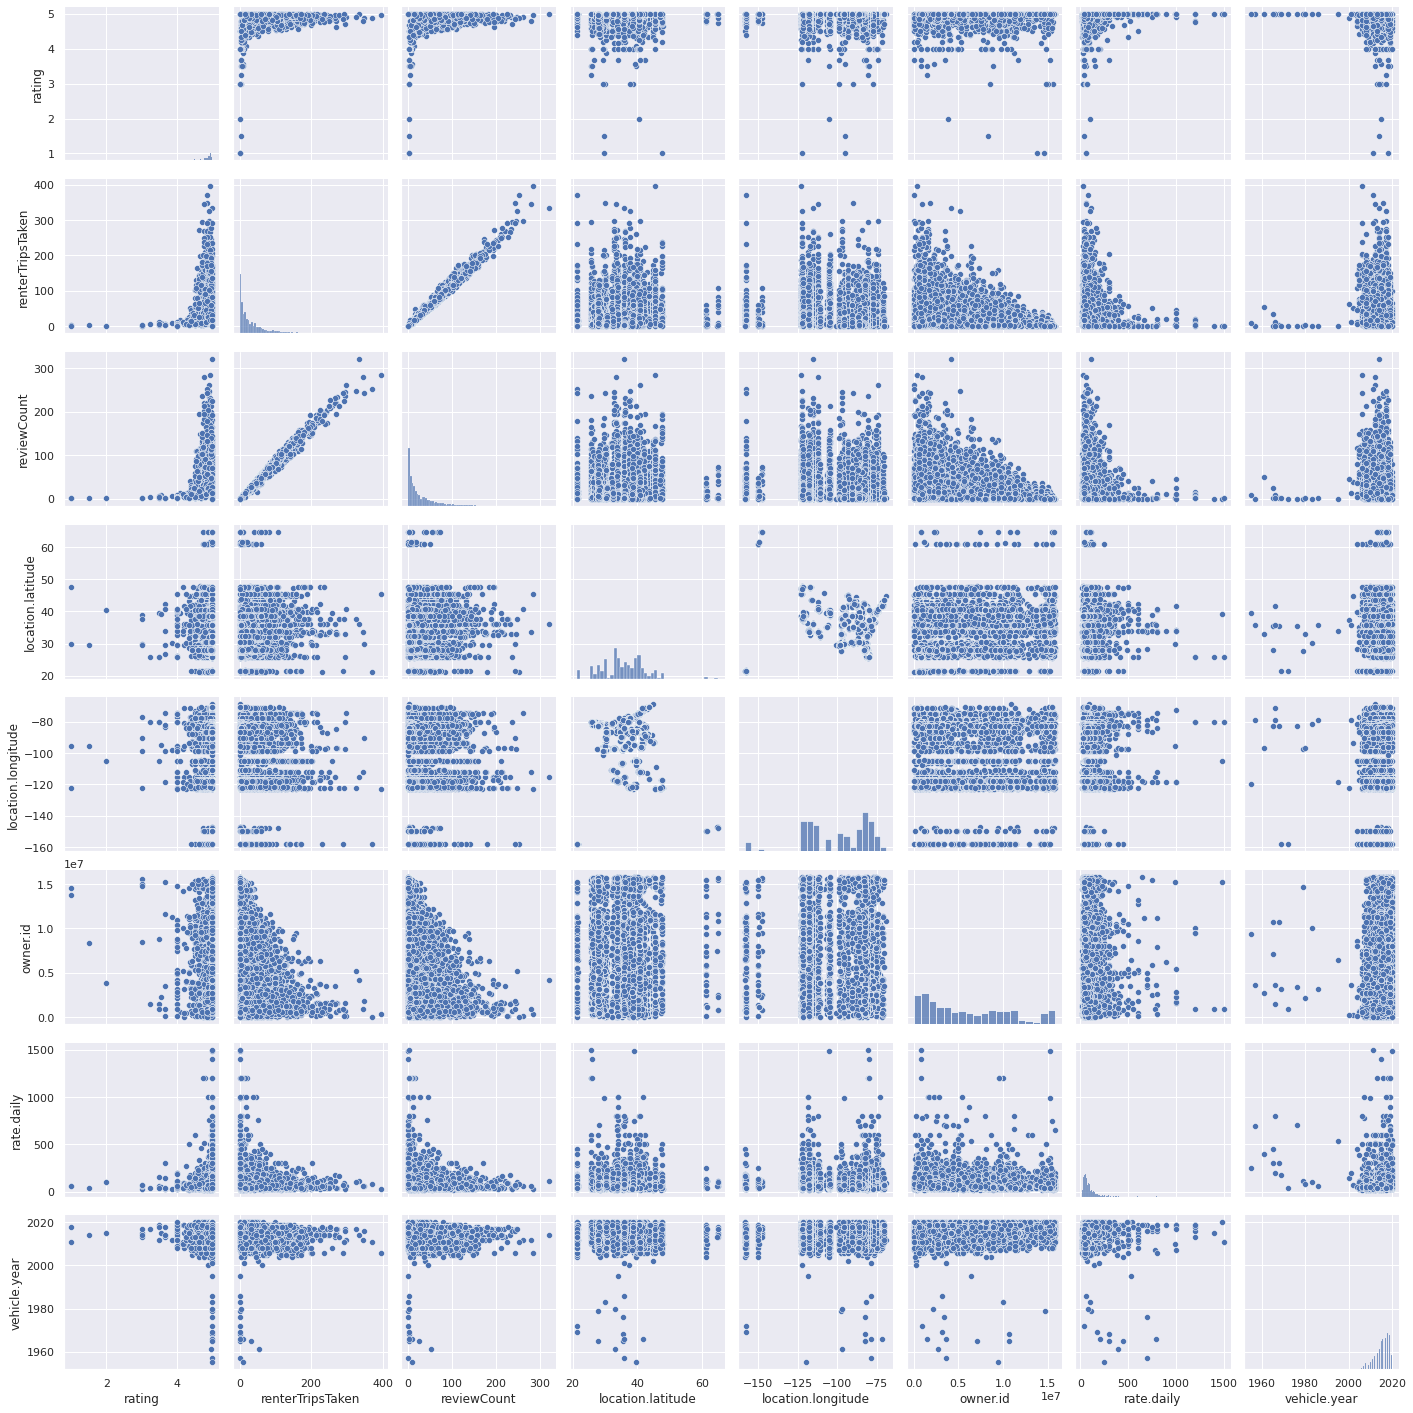

In [36]:
sns.pairplot(data)

#### Histogram of Rental Car Rating


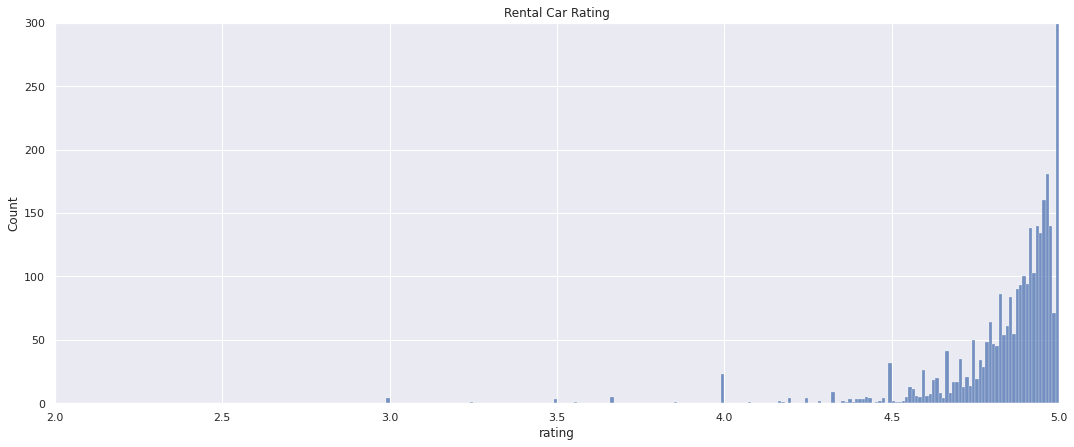

<Figure size 432x288 with 0 Axes>

In [14]:
f, ax = plt.subplots(figsize=(18, 7))
sns.histplot(data=data1, x="rating", binwidth=.01)
ax.set_ylim(0,300)
ax.set_xlim(2,5)
plt.title('Rental Car Rating')
plt.show()
plt.savefig('Rental Car Rating.png', format='png')

#### Histogram of vehicle_year

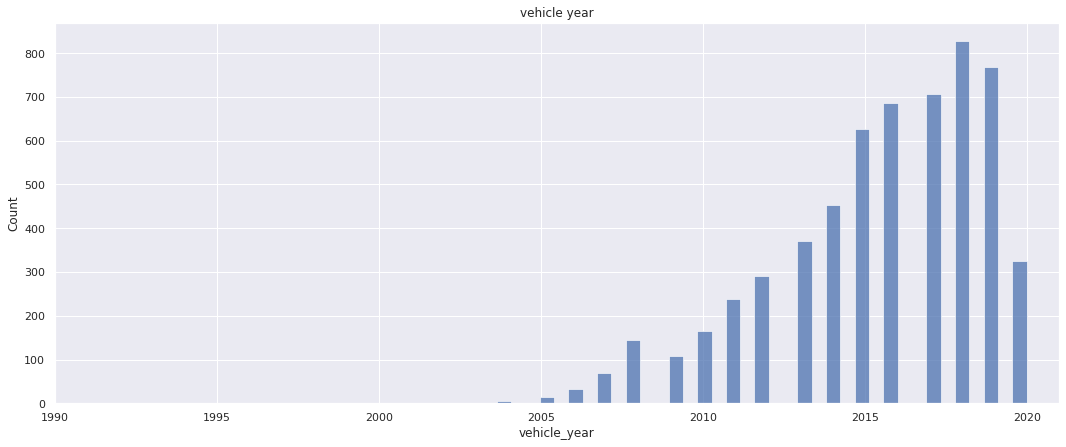

<Figure size 432x288 with 0 Axes>

In [15]:
f, ax = plt.subplots(figsize=(18, 7))
sns.histplot(data=data1, x="vehicle_year")
ax.set_xlim(1990,2021)
plt.title('vehicle year')
plt.show()
plt.savefig('vehicle year.png', format='png')

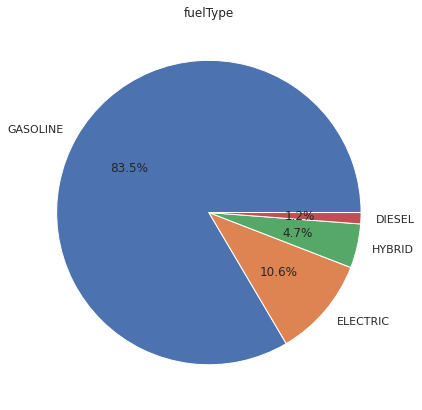

<Figure size 432x288 with 0 Axes>

In [16]:
labels=data1['fuelType'].value_counts().index
values=data1['fuelType'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values ,labels = labels ,autopct='%1.1f%%')
plt.title('fuelType')
plt.show()
plt.savefig('Fuel Type.png', format='png')

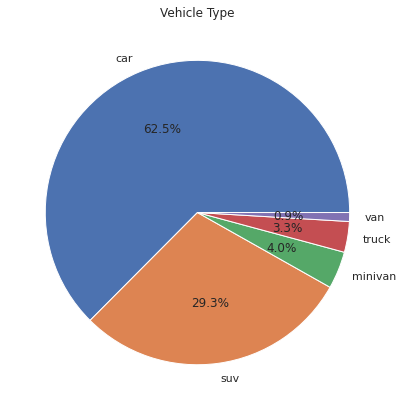

<Figure size 432x288 with 0 Axes>

In [17]:
labels=data1['vehicle.type'].value_counts().index
values=data1['vehicle.type'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values ,labels = labels ,autopct='%1.1f%%')
plt.title('Vehicle Type')
plt.show()
plt.savefig('Vehicle Type.png', format='png')

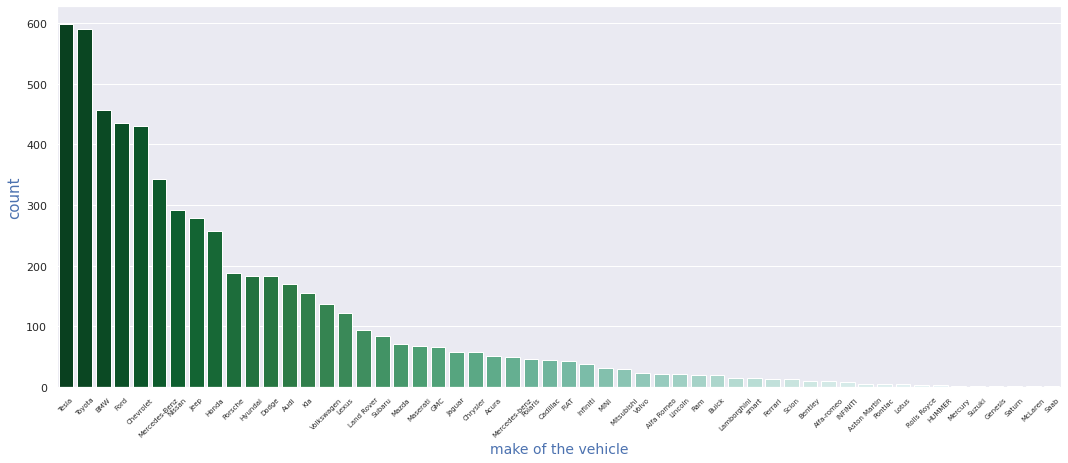

In [18]:
labels=data1['vehicle.make'].value_counts().index
f, ax = plt.subplots(figsize=(18, 7))
sns.countplot(x='vehicle.make', data=data1,
              order = labels,
              #hue='vehicle.year'
              palette="BuGn_r"
           )
plt.xticks(rotation= 45,fontsize=7 )
ax.set_ylabel('count', fontsize=15, color='b')
ax.set_xlabel('make of the vehicle', fontsize=14, color='b')
#plt.savefig('make of the vehicle.png', format='png')
plt.savefig('myimage.svg', format='svg', dpi=1200)

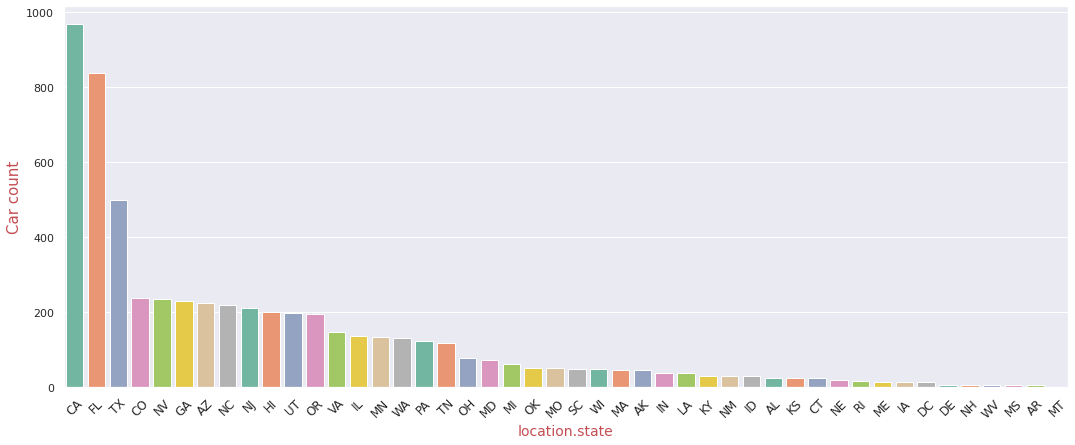

In [19]:
labels=data1['location.state'].value_counts().index
f, ax = plt.subplots(figsize=(18, 7))
sns.countplot(x='location.state', data=data1,
              order = labels,
              #hue='vehicle.year'
              palette="Set2"
           )
plt.xticks(rotation= 45,fontsize=12 )
ax.set_ylabel('Car count', fontsize=15, color='r')
ax.set_xlabel('location.state', fontsize=14, color='r')
#plt.savefig('make of the vehicle.png', format='png')
plt.savefig('Car count per state', format='svg', dpi=1200)

California, Florida,and Texas are top three states by clear difference from the rest of the states . 

In [20]:
import plotly_express as px
data_make_model = data1.groupby(['vehicle.make', 'vehicle.model']).size().reset_index()
data_make_model.rename(columns = {0:'model_count'}, inplace=True)
data_make_model['make_count'] = data_make_model['vehicle.make'].apply(
    lambda x : data_make_model[data_make_model['vehicle.make'] == x]['model_count'].sum())
data_make_model.sort_values(by = 'make_count', ascending=False, inplace=True)
fig =px.scatter(data_make_model[data_make_model['make_count'] >45],
             x = 'vehicle.make', y='model_count', color = 'vehicle.model',width=1100, height=700,
                title='Make and Model of Top Most Rented Cars')
fig.show()


In [21]:
fig =px.scatter(data1,
             x = 'vehicle.make', y='rate_daily', color = 'vehicle.model',width=1100, height=700,
                title='Daily rate of cars')
fig.show()
